# 2. Collective Analysis of Tweets

Daniel Ruiz, MSc in Data Science and Business Analytics (DSBA), Bocconi University

Reference codes (alphabetically):

## 2.1. Loading packages and hard data

In [2]:
# general
import numpy as np
import pandas as pd
import time

# graphs
import matplotlib.pyplot as plt
import seaborn as sns

## 2.2. Merging databases

In [7]:
#-------------------------------------------------------------------
my_companies = [['br_embraer','@EMBRAER','#EMBRAER'], #0
                ['br_americanas','@LOJASAMERICANAS','#LOJASAMERICANAS'], #1
                ['br_pontofrio','@PONTOFRIO','#PONTOFRIO'], #2
                ['br_petrobras','@PETROBRAS','#PETROBRAS'], #3
                ['br_bradesco','@BRADESCO','#BRADESCO'], #4
                ['br_itau','@ITAU','#ITAU'], #5
                ['br_renner','@LOJAS_RENNER','#RENNER'], #6
                ['br_gol','@VOEGOLOFICIAL','#VOEGOL'], #7
                ['br_magazineluiza','@MAGAZINELUIZA','#MAGALU'], #8
                ['br_valor','@VALORECONOMICO','#VALORECONOMICO'], #9
                ['us_abercrombie','@ABERCROMBIE','#ABERCROMBIE'], #10
                ['us_boeing','@BOEING','#BOEING'], #11
                ['us_beyondmeat','@BEYONDMEAT','#BEYONDMEAT'], #12
                ['us_morganstanley','@MORGANSTANLEY','#MORGANSTANLEY'], #13
                ['us_jpmorgan','@JPMORGAN','#JPMORGAN'], #14
                ['us_exxonmobil','@EXXONMOBIL','#EXXON'], #15
                ['us_americanair','@AMERICANAIR','AMERICANAIRLINES'], #16
                ['us_cocacola','@COCACOLA','#COCACOLA'], #17
                ['us_tesla','@TESLA','#TESLA'], #18
                ['us_wsj','@WSJ','#WSJ']] #19

#-------------------------------------------------------------------

df = pd.read_pickle('Dataset_Twitter_Clean_02/br_embraer.pkl')
print('br_embraer')

for company in my_companies[1:]:

    # open and read file
    filename='Dataset_Twitter_Clean_02/'+company[0]+'.pkl'
    df_sup = pd.read_pickle(filename)
    print(company[0])
    
    # append
    df = df.append(df_sup)

print(df.columns)

# remove duplicates (if the same tweet mentions two companies)
print(df.shape)
df = df.drop_duplicates('id')
print(df.shape)

br_embraer
br_americanas
br_pontofrio
Index(['text', 'id', 'datetime', 'user_name', 'user_followers', 'comp_user',
       'comp_hash', 'comp_country', 'hashtags', 'count_char', 'count_tokens',
       'is_retweet', 'clean_01', 'clean_02', 'tweet_language', 'tweet_en',
       'tweet_pt', 'snowball_stems', 'count_words', 'count_stems'],
      dtype='object')


## 2.3. Understanding collective content
In this section we clean tweets by loooking at their collective characteristics (i.e. all tweets in the same dataframe). For example, we filter out words that appeared very few times, or users that look suspicious (i.e. spam).

### Defining functions

In [9]:
def plot_columns(x,y,title='',xl='',yl=''):
    
    plt.rc('axes',axisbelow=True)
    
    sns.set()
    
    f, ax = plt.subplots(figsize=(18,6))
    sns.set()
    
    plt.bar(x,y)
    
    # labels
    plt.xlabel(xl,fontsize=15,fontweight='bold')
    plt.ylabel(yl,fontsize=15,fontweight='bold')
    
    # ticks
    #plt.xticks(x,x, fontsize=10, rotation=0)
    
    # others
    plt.title(title,fontsize=20,fontweight='bold')
    
    plt.grid(ls=':',fillstyle='bottom')
    
    # visual
    #plt.ylim([0,min([200,np.percentile(y,99)*2,np.percentile(y,100)*1.1])])
    
    # finally
    plt.show()
    
    # save image
    ax.figure.savefig('TweetCollectiveAnalysis/'+title+'.png')
    
    plt.close()

### How many tweets did each user post?

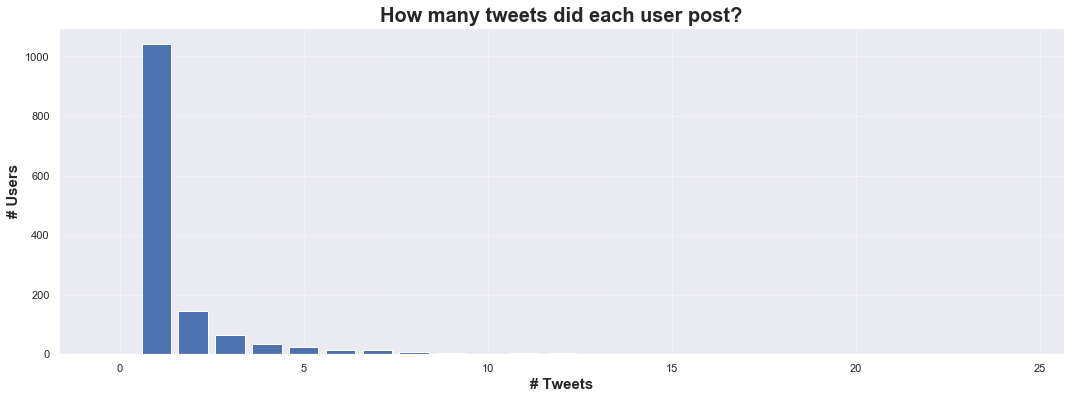

In [10]:
# no mega posters -> plausibility of wisdom of the crowds

# series
base_series = df.user_name.value_counts()
x = [i for i in range(0, base_series.max()+1)]
y = [base_series[base_series==i].size for i in x]

# plot
plot_columns(x,
             y,
             'How many tweets did each user post?',
             xl='# Tweets',
             yl='# Users')

### How many characters did tweets have? (downward bias)

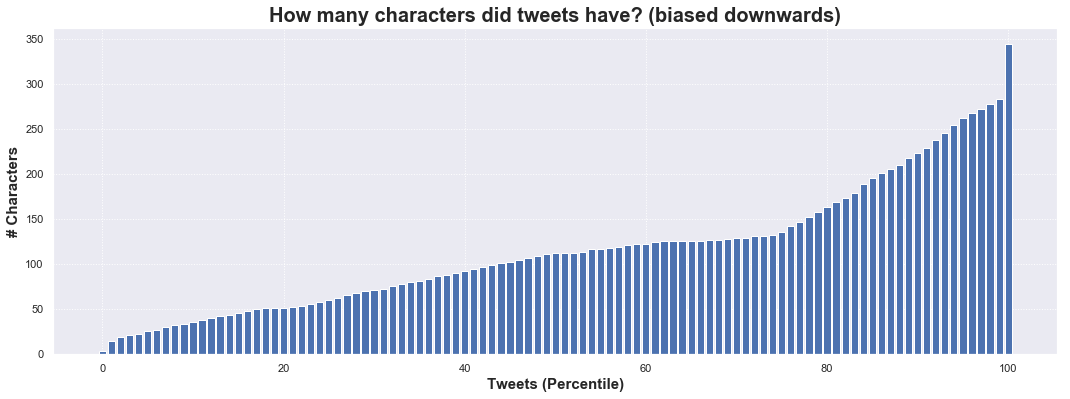

In [12]:
# rough number
# -> URLS/images disappear -> understatement bias

base_series = df.count_char

# series
x = [i for i in range(101)]
y = [np.percentile(base_series,i) for i in x]

# plot
sup1, sup2 = 0, 101
plot_columns(x[sup1:sup2],
             y[sup1:sup2],
             title='How many characters did tweets have? (biased downwards)',
             xl='Tweets (Percentile)',
             yl='# Characters')

### How many tokens did tweets have? (downward bias)

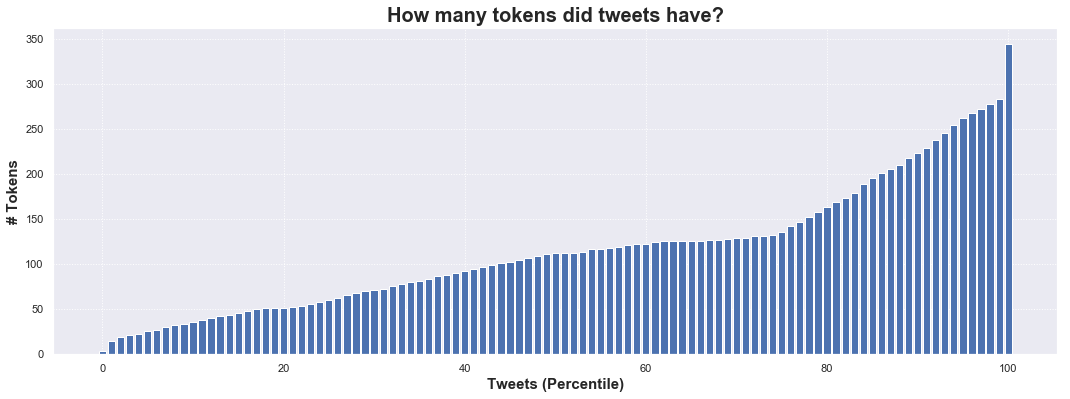

In [13]:
base_series = df.count_tokens

# series
x = [i for i in range(101)]
y = [np.percentile(base_series,i) for i in x]

# plot
sup1, sup2 = 0, 101
plot_columns(x[sup1:sup2],
             y[sup1:sup2],
             title='How many tokens did tweets have?',
             xl='Tweets (Percentile)',
             yl='# Tokens')

### How many words did tweets have?

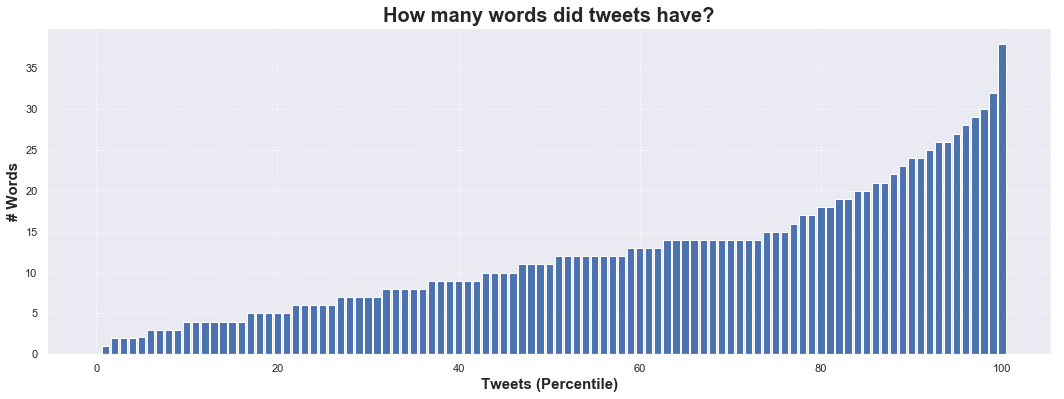

In [14]:
# rough number: ex stopwords, special characters

base_series = df.count_words

# series
x = [i for i in range(101)]
y = [np.percentile(base_series,i) for i in x]

# plot
sup1, sup2 = 0, 101
plot_columns(x[sup1:sup2],
             y[sup1:sup2],
             title='How many words did tweets have?',
             xl='Tweets (Percentile)',
             yl='# Words')

### How many stems did tweets have?

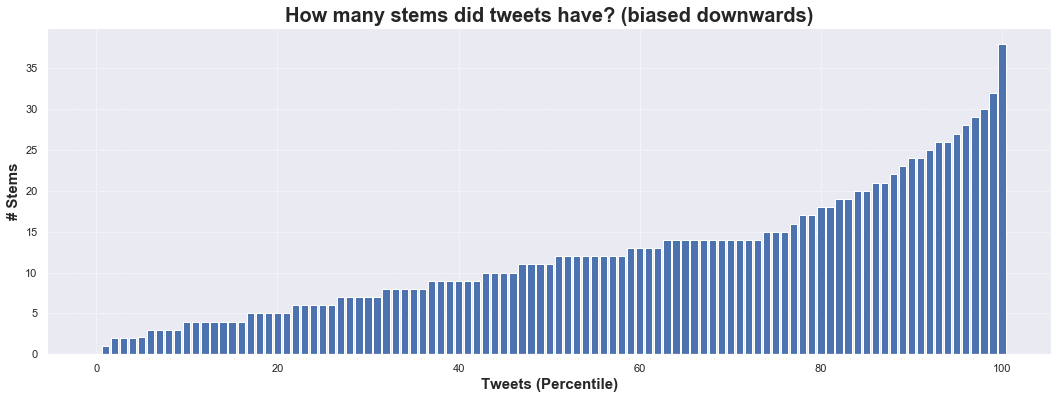

In [15]:
# rough number: ex stopwords, special characters

base_series = df.count_stems

# series
x = [i for i in range(101)]
y = [np.percentile(base_series,i) for i in x]

# plot
sup1, sup2 = 0, 101
plot_columns(x[sup1:sup2],
             y[sup1:sup2],
             title='How many stems did tweets have? (biased downwards)',
             xl='Tweets (Percentile)',
             yl='# Stems')

### How many followers did users have?

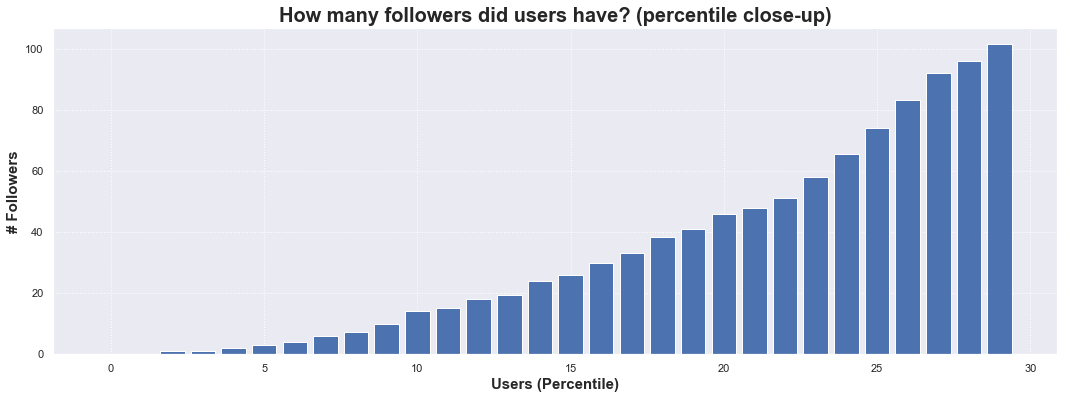

In [17]:
# how many followers users have?
# some users are 'celebrities', but we are interested in the bottom
# too few followers = skam risk

# series
base_series = df.user_followers
x = [i for i in range(101)]
y = [np.percentile(base_series,i) for i in x]

print(y[19])
print(y[20])
print(y[21])

# plot
sup1, sup2 = 0, 101
plot_columns(x[sup1:sup2],
             y[sup1:sup2],
             title='How many followers did users have?',
             xl='Users (Percentile)',
             yl='# Followers')